In [88]:
# This is a clustering analysis notebook

In [1]:
!pip install scikit-fuzzy

    100% |████████████████████████████████| 1.0MB 1.1MB/s ta 0:00:01
  Running setup.py bdist_wheel for scikit-fuzzy ... done
  Stored in directory: /Users/mochiliao/Library/Caches/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


Text(0.5, 0, 'Z-axis')

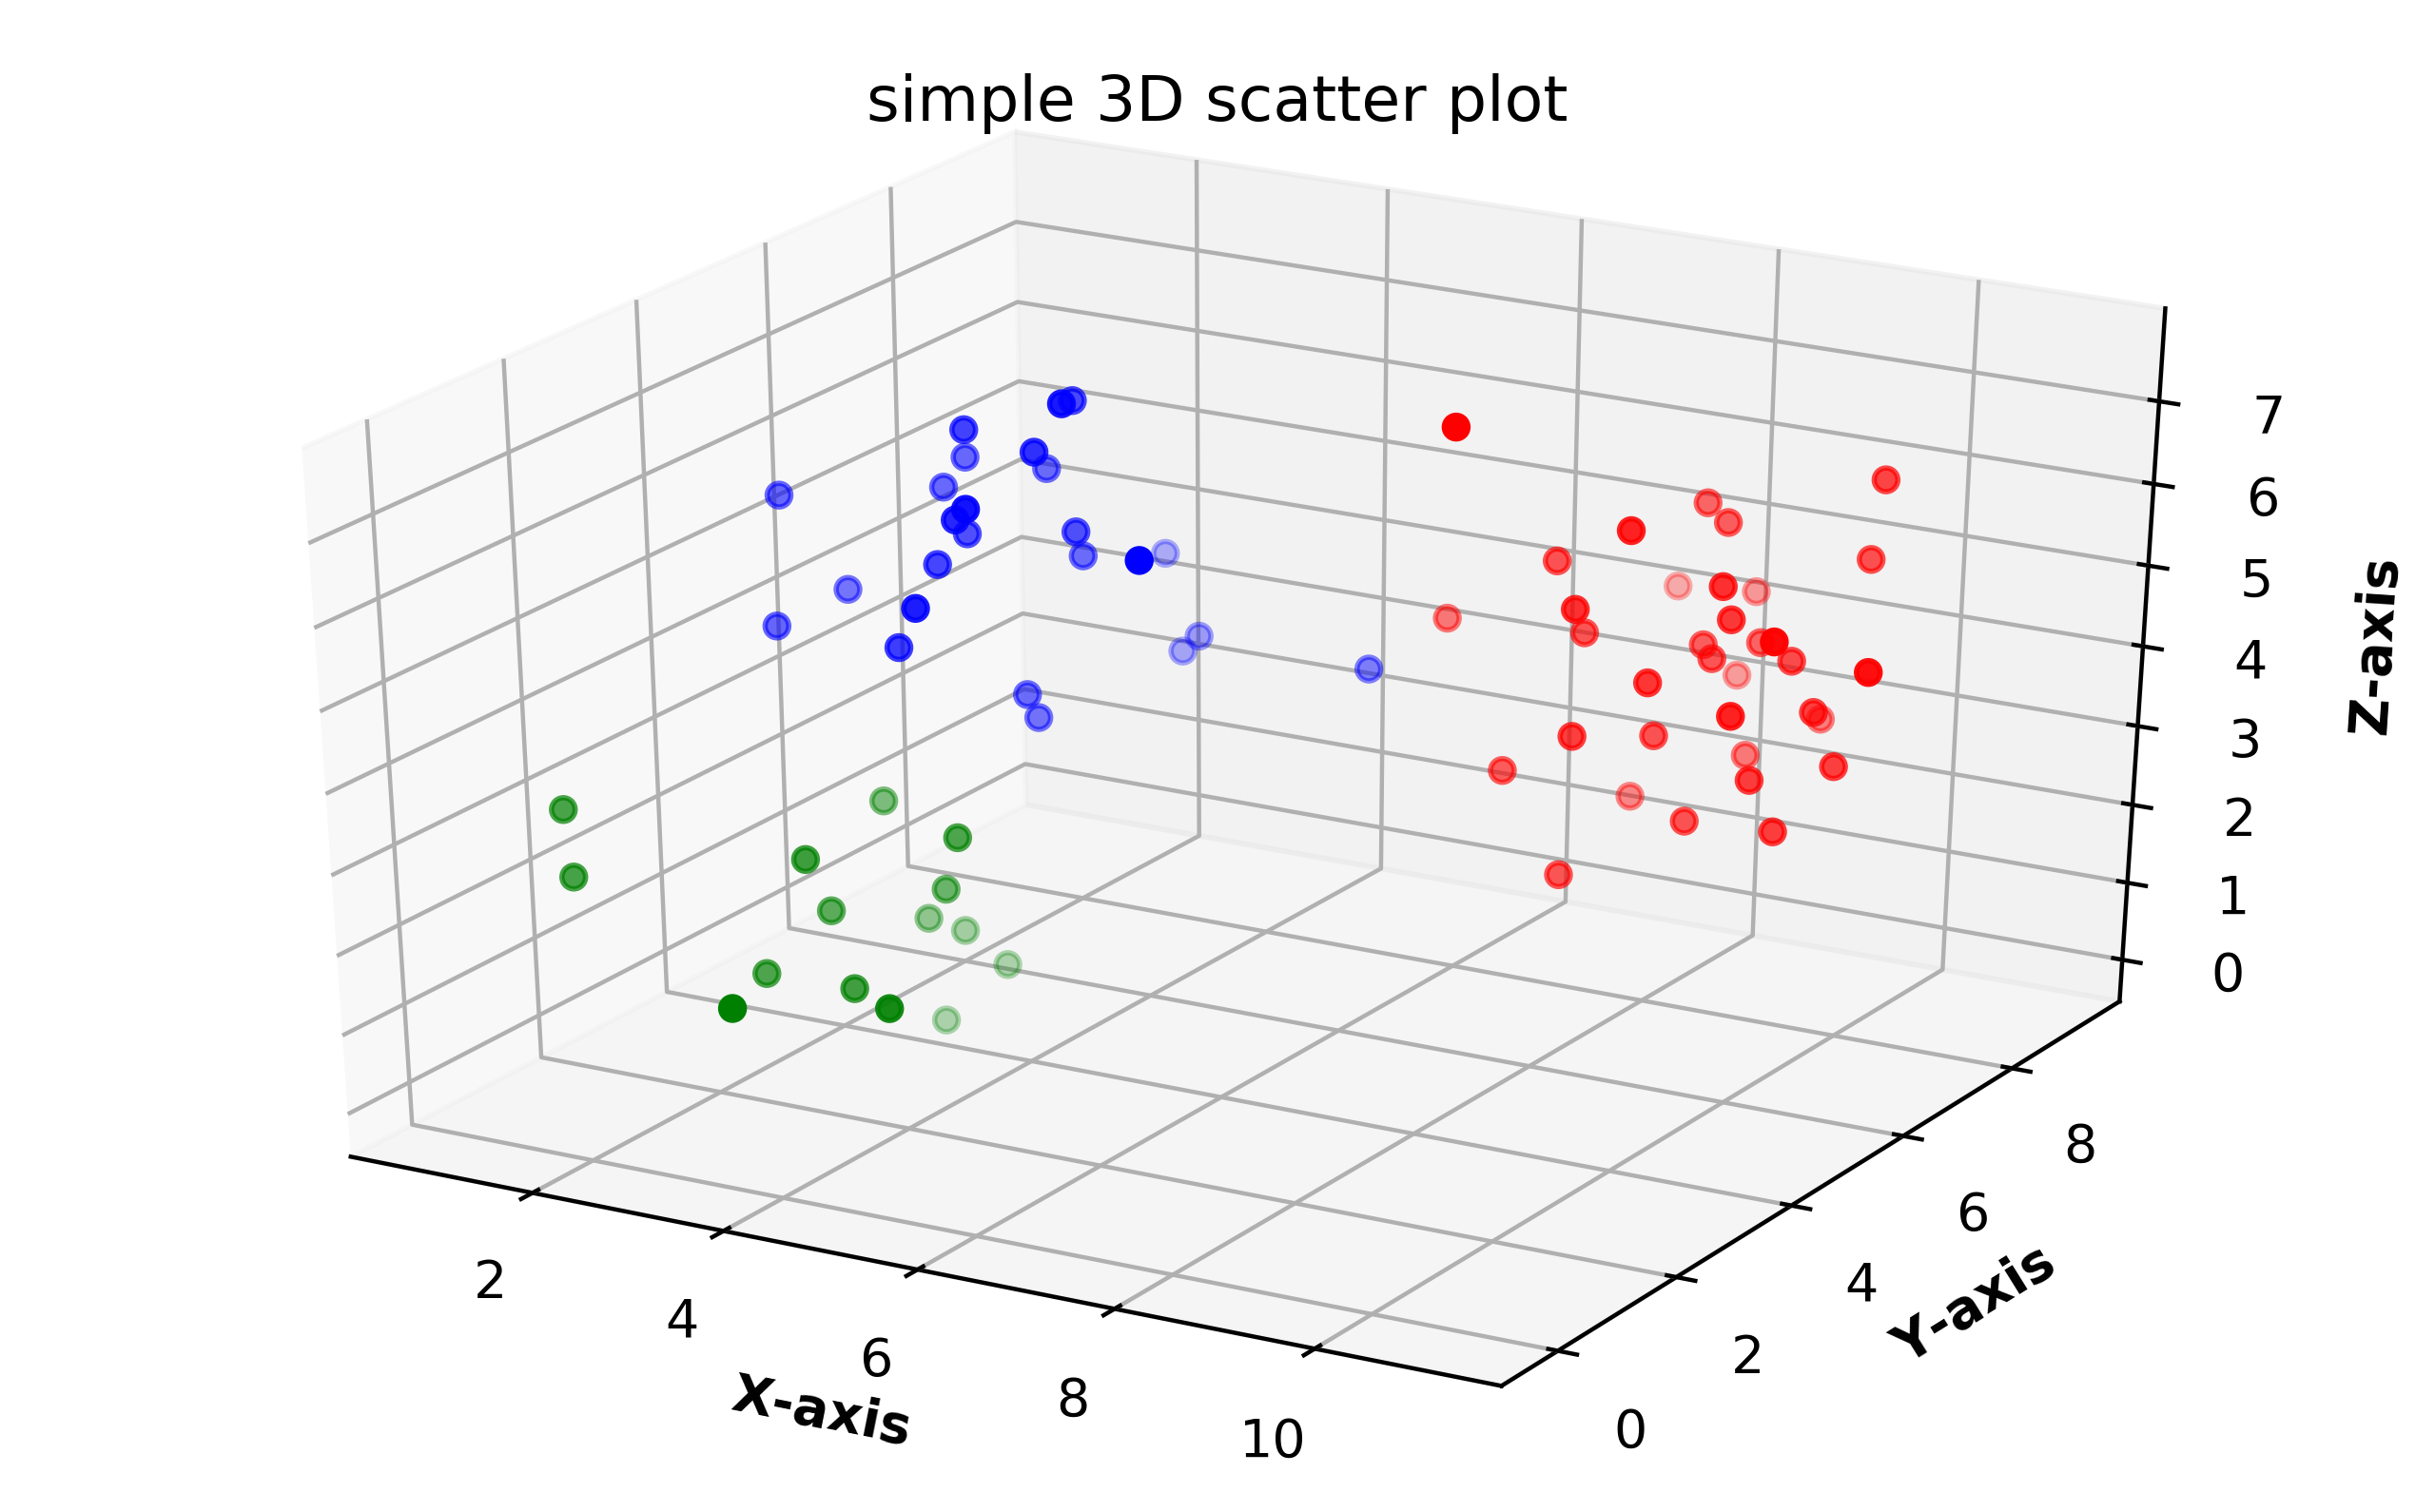

In [96]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import skfuzzy as fuzz

# generate random normally distributed point clouds (customize as needed)
x1 = np.random.normal(loc=3.0, size=15)
y1 = np.random.normal(loc=2.0, size=15)
z1 = np.random.normal(loc=2.0, size=15)
x2 = np.random.normal(loc=9.0, size=35)
y2 = np.random.normal(loc=7.0, size=35)
z2 = np.random.normal(loc=4.0, size=35)

x3 = np.random.normal(loc=4.0, size=25)
y3 = np.random.normal(loc=4.0, size=25)
z3 = np.random.normal(loc=6.0, size=25)

# now do the plotting with matplotlib
# plt.scatter(x1,y1,z1,color='red')
# plt.scatter(x2,y2,z2,color='blue', marker= '^',s=35)
# plt.xlim(-5,15)
# plt.ylim(-5,15)
# plt.xlabel('$x_1$',fontsize=25)
# plt.ylabel('$x_2$',fontsize=25)
# plt.savefig('example.png', bbox_inches='tight')
# plt.show()

# Creating figure
fig = plt.figure(figsize = (8, 5), dpi = 400)
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x1, y1, z1, color = "green")
ax.scatter3D(x2, y2, z2, color = "red")
ax.scatter3D(x3, y3, z3, color = "blue")
plt.title("simple 3D scatter plot")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')

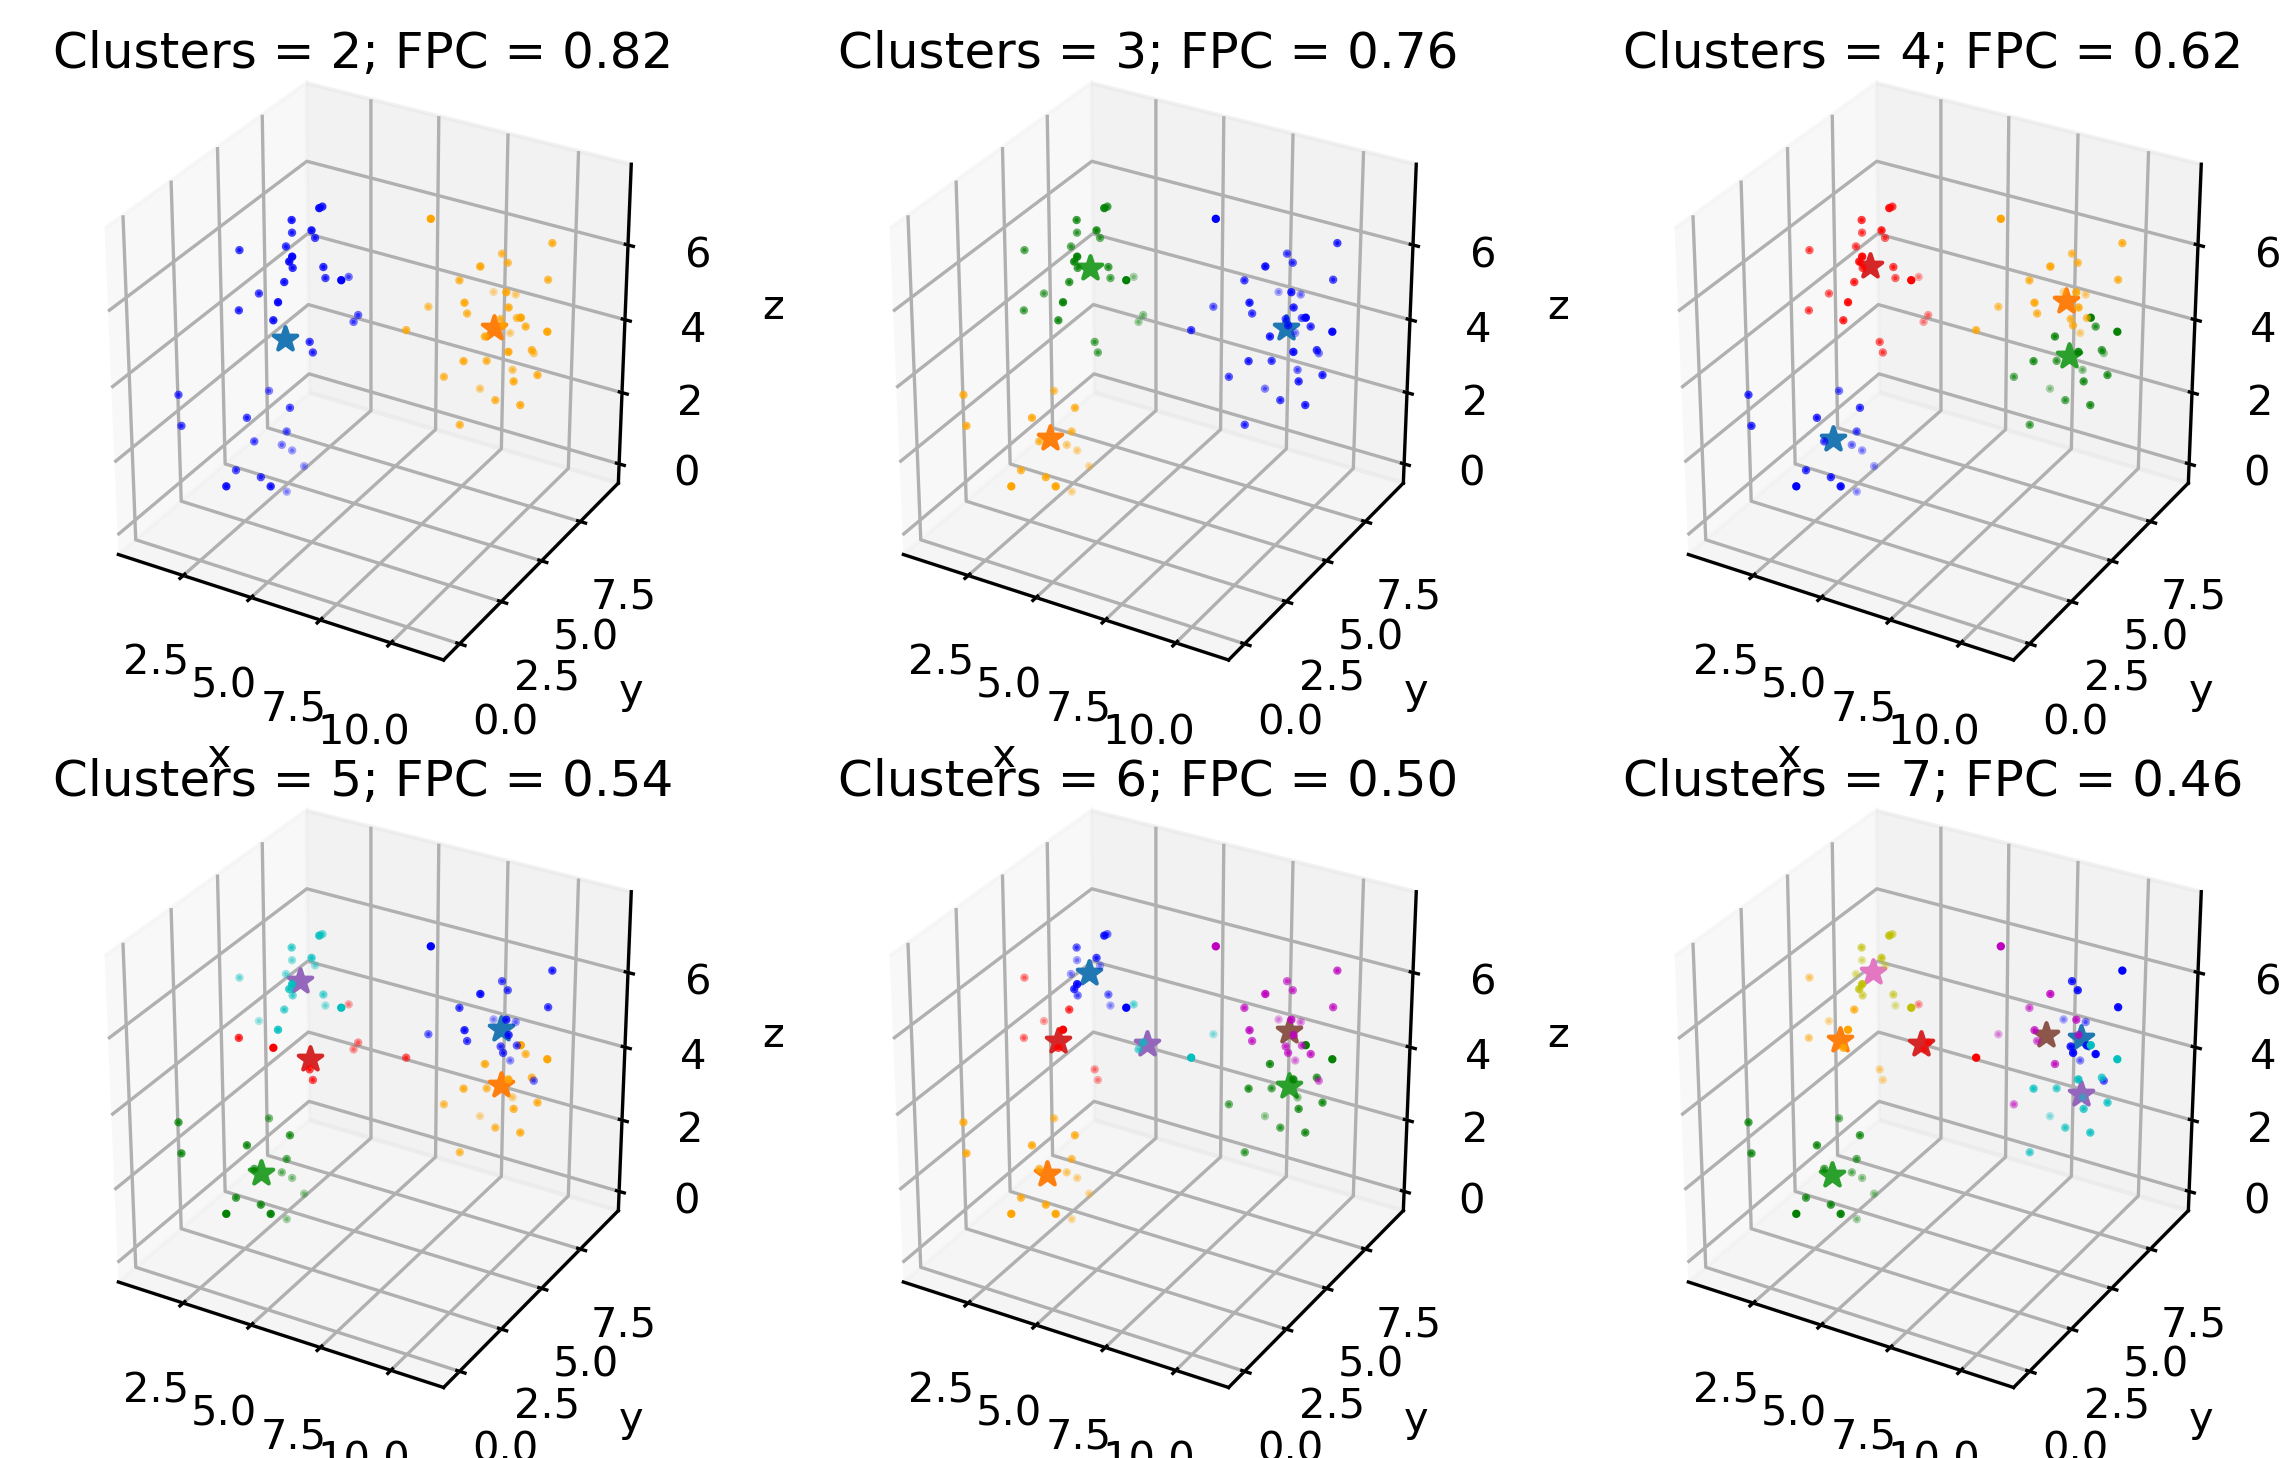

In [115]:
xpts = np.concatenate((x1, x2, x3))
ypts = np.concatenate((y1, y2, y3))
zpts = np.concatenate((z1, z2, z3))
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Set up the loop and plot
#fig1, axes1 = plt.subplots(2, 3, figsize=(8, 8))
fig = plt.figure(figsize=(8,5),dpi=300)#plt.figaspect(0.4))
alldata = np.vstack((xpts, ypts, zpts))
fpcs = []
for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)
    # Store fpc values for later
    fpcs.append(fpc)
    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    ax = fig.add_subplot(2, 3, ncenters-1, projection='3d')
    for j in range(ncenters):
        sci = ax.scatter3D(xpts[cluster_membership == j],
                             ypts[cluster_membership == j], 
                             zpts[cluster_membership == j], '.', s=1, color=colors[j])
    for pt in cntr:
         scj = ax.scatter3D(pt[0], pt[1], pt[2], s=35, marker = '*')


    ax.set_title('Clusters = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    #ax.axis('off')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z');
fig.tight_layout()
plt.show()

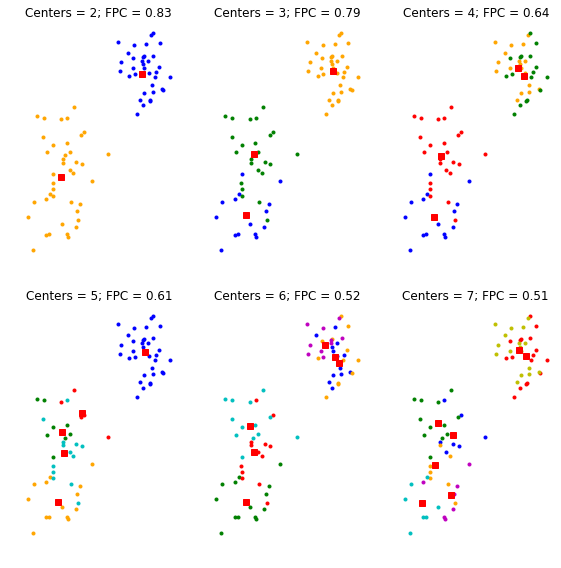

In [22]:
xpts = np.concatenate((x1, x2, x3))
ypts = np.concatenate((y1, y2, y3))
zpts = np.concatenate((z1, z2, z3))
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Set up the loop and plot
fig1, axes1 = plt.subplots(2, 3, figsize=(8, 8))
alldata = np.vstack((xpts, ypts, zpts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()

Text(0, 0.5, 'Fuzzy partition coefficient')

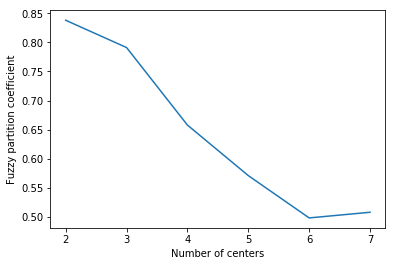

In [15]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:8], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")